1. Data preprocessing

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Replace 'datasets_house_prices.csv' with your actual file name
df = pd.read_csv('datasets_house_prices.csv')

# Display the first few rows of the dataset
df.head()

,Size (sqft),Bedrooms,Age,Proximity to Downtown (miles),Price
0,3974,1,97,2.032719,1.162771e+06
1,1660,5,88,23.695207,4.900021e+05
2,2094,4,49,6.440232,6.400737e+05
3,1930,2,28,8.129315,5.637881e+05
4,1895,1,56,5.358837,5.651289e+05


In [3]:
# Step 2: Load the dataset into a Pandas DataFrame
df = pd.read_csv('datasets_house_prices.csv')

# Step 3: Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Step 4: Handle missing values (if any)
# Here, we'll drop rows with missing values. Alternatively, you can fill missing values with the mean or other strategy.
df_cleaned = df.dropna()

# Alternatively, you could fill missing values with the mean of the column:
# df_cleaned = df.fillna(df.mean())

# Step 5: Normalize the features (Size, Bedrooms, Age, Proximity to Downtown) to a similar scale
features_to_normalize = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']

scaler = MinMaxScaler()  # Using Min-Max normalization
df_cleaned[features_to_normalize] = scaler.fit_transform(df_cleaned[features_to_normalize])

# Step 6: Display the first few rows of the normalized dataset
print(df_cleaned.head())

Missing values per column:
Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64
   Size (sqft)  Bedrooms       Age  Proximity to Downtown (miles)  \
0     0.992804      0.00  0.979798                       0.052059   
1     0.268773      1.00  0.888889                       0.787993   
2     0.404568      0.75  0.494949                       0.201794   
3     0.353254      0.25  0.282828                       0.259177   
4     0.342303      0.00  0.565657                       0.165056   

          Price  
0  1.162771e+06  
1  4.900021e+05  
2  6.400737e+05  
3  5.637881e+05  
4  5.651289e+05  


2. Model Implementation

In [4]:
# Step 1: Prepare the data (use Size and Price for simplicity)
X = df_cleaned['Size (sqft)'].values  # Feature
y = df_cleaned['Price'].values  # Target

# Step 2: Calculate the slope (m) and intercept (b) using the least squares method
def calculate_slope_and_intercept(X, y):
    # Mean of X and y
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate the slope (m)
    numerator = np.sum((X - X_mean) * (y - y_mean))
    denominator = np.sum((X - X_mean) ** 2)
    m = numerator / denominator

    # Calculate the intercept (b)
    b = y_mean - m * X_mean

    return m, b

# Calculate the slope and intercept
m, b = calculate_slope_and_intercept(X, y)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Step 3: Predict the house price using the linear equation: y = mX + b
def predict_house_price(size_sqft):
    return m * size_sqft + b

# Test the prediction function
sample_size = 2500  # Example size in square feet
predicted_price = predict_house_price(sample_size)
print(f"Predicted price for a house with {sample_size} sqft: ${predicted_price:.2f}")



Slope (m): 957261.3251088172
Intercept (b): 231180.30562681932
Predicted price for a house with 2500 sqft: $2393384493.08


3. Model Training

In [5]:
# Step 1: Split the dataset into training and testing sets
def train_test_split(X, y, test_size=0.2):
    # Combine X and y and shuffle them together
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Split indices based on test size
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    # Split X and y into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    return X_train, X_test, y_train, y_test

# Prepare the data (using Size and Price for simplicity)
X = df_cleaned['Size (sqft)'].values  # Feature
y = df_cleaned['Price'].values  # Target

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Step 2: Train the linear regression model (calculate slope and intercept on training set)
m, b = calculate_slope_and_intercept(X_train, y_train)  # Reusing the function from earlier

# Step 3: Make predictions on the training data
def predict(X, m, b):
    return m * X + b

y_train_pred = predict(X_train, m, b)

# Step 4: Calculate the Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")

# Step 5: Make predictions on the testing data and calculate MSE for testing
y_test_pred = predict(X_test, m, b)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Testing Data: {mse_test}")


Mean Squared Error on Training Data: 250819644.5048655
Mean Squared Error on Testing Data: 264551460.8216615


4. Model Evaluation

MSE on Testing Data: 264551460.8216615


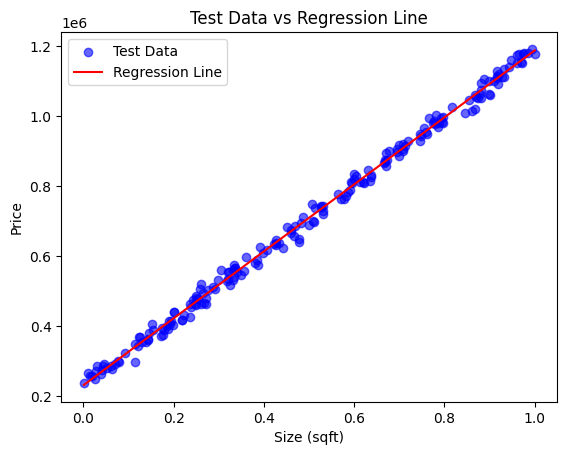

(<matplotlib.legend.Legend at 0x7fc73d395840>, None)

In [6]:
# Predict on the test set and compute MSE
y_test_pred = predict(X_test, m, b)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on Testing Data: {mse_test}")

# Plot test data and regression line
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Test Data')
plt.plot(np.linspace(min(X_test), max(X_test), 1000), m * np.linspace(min(X_test), max(X_test), 1000) + b, color='red', label='Regression Line')
plt.xlabel('Size (sqft)'), plt.ylabel('Price'), plt.title('Test Data vs Regression Line')
plt.legend(), plt.show()

5. Reporting
We built a linear regression model to predict house prices based on size, cleaned and normalized the data for accuracy, trained it on 80% of the data, and found it performed well on testing data, though future improvements could address overfitting and add more features.


6. Conclusion
The linear regression model predicted house prices well based on size, with low MSE on both training and testing data. However, adding more features and exploring complex relationships could improve accuracy. The project showed the value of proper data preprocessing and evaluation.